In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
from ExplainableModels import ExplainableModel
from agreement import attributions_preprocessing
import os
from matplotlib import pyplot as plt
import matplotlib as mtpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from plot import plot_mean_ensemble,plot_with_topk,plot
from typing import List
import numpy as np
from compute_adversarial_robustness import main
from compute_adversarial_robustness_ensemble import main_ensemble

/home/srepetto/miniconda3/envs/XAI-for-Healthcare/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def load_data(data_name:str, n_classes:int):
    model = ExplainableModel(model_name = "resnet50",
                                        train_data_name = data_name,
                                        n_classes = n_classes)
    
    data=ExplainableModel.load_data(data_name=data_name,
                                        data_split="test")
    
    return data

In [4]:
def load_explanations(train_data_name:str,data_name:str, n_classes:int, batch_size:int=32):
    model = ExplainableModel(model_name = "resnet50",
                                        train_data_name = train_data_name,
                                        n_classes = n_classes)
    attributions = model.calculate_all_attributions(
                        train_data_name = train_data_name,data_name=data_name,
                        data_split="test")
    
    
    return attributions

In [ ]:
#prima fare il finetuning del modello e del dataset
#CUDA_VISIBLE_DEVICES=0 python3 /data/srepetto/Explanation_variability_paper_version/fine_tune.py --prepare_data --data_name dermamnist --split_to_use test --corrupt --corruption_type gaussian_noise --fine_tune

In [ ]:
#loading original explanations
original_explanations = load_explanations(train_data_name='dermamnist',data_name ='dermamnist',n_classes=7,batch_size=16)

In [ ]:
#loading original data and explanations
original_explanations = load_explanations(train_data_name='dermamnist',data_name ='dermamnist_corrupted_gaussian_noise',n_classes=7,batch_size=16)

In [ ]:
#compute fidelity and natural noise robustness with postprocessing
attributions_per_algorithm = plot(data_name='dermamnist',model_name='resnet50',
                                corruption_type = 'gaussian_noise', #pixelate,brightness_up
                                agreement_measure='l1',
                                normalization='quantil_local', 
                                n_classes = 7)


In [5]:
#compute adversarial robustness with postprocessing
attributions_per_algorithm_adv = main(data_name='dermamnist',
                                  epsilon=2,
                                  model_name='resnet50',
                                  n_classes = 7)

checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


/home/srepetto/miniconda3/envs/XAI-for-Healthcare/lib/python3.12/site-packages/captum/attr/_core/guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 5116.25it/s]


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


/home/srepetto/miniconda3/envs/XAI-for-Healthcare/lib/python3.12/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 3379.51it/s]


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 3648.81it/s]


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 6365.81it/s]


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 5361.78it/s]


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


/home/srepetto/miniconda3/envs/XAI-for-Healthcare/lib/python3.12/site-packages/captum/attr/_utils/batching.py:45: UserWarning: Internal batch size cannot be less than the number of input examples. Defaulting to internal batch size of 32 equal to the number of examples.
  warnings.warn(


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 5330.70it/s]


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 4916.03it/s]


loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth


Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 6035.14it/s]


✅ Risultati già presenti, caricamento da file…
🧩 Calcolo mean ensemble: postprocessing
checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
attributions/resnet50_attributions/dermamnist/dermamnist_test/
Attributions for SmoothGrad already exist. (attributions/resnet50_attributions/dermamnist/dermamnist_test/)
attributions/resnet50_attributions/dermamnist_corrupted_gaussian_noise/dermamnist_corrupted_gaussian_noise_test/
Attributions for SmoothGrad already exist. (attributions/resnet50_attributions/dermamnist_corrupted_gaussian_noise/dermamnist_corrupted_gaussian_noise_test/)
Dataset dermamnist_224 split test loaded
checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
attributions/resnet50_attributions/dermamnist/dermamnist_test/
Attributions for SmoothGrad already exist. (attributions/resnet50_attributions/dermamnist/dermamnist_test/)
attributions/resnet50_attributions/

Occlusion curve: 100%|██████████| 11/11 [00:37<00:00,  3.45s/it]


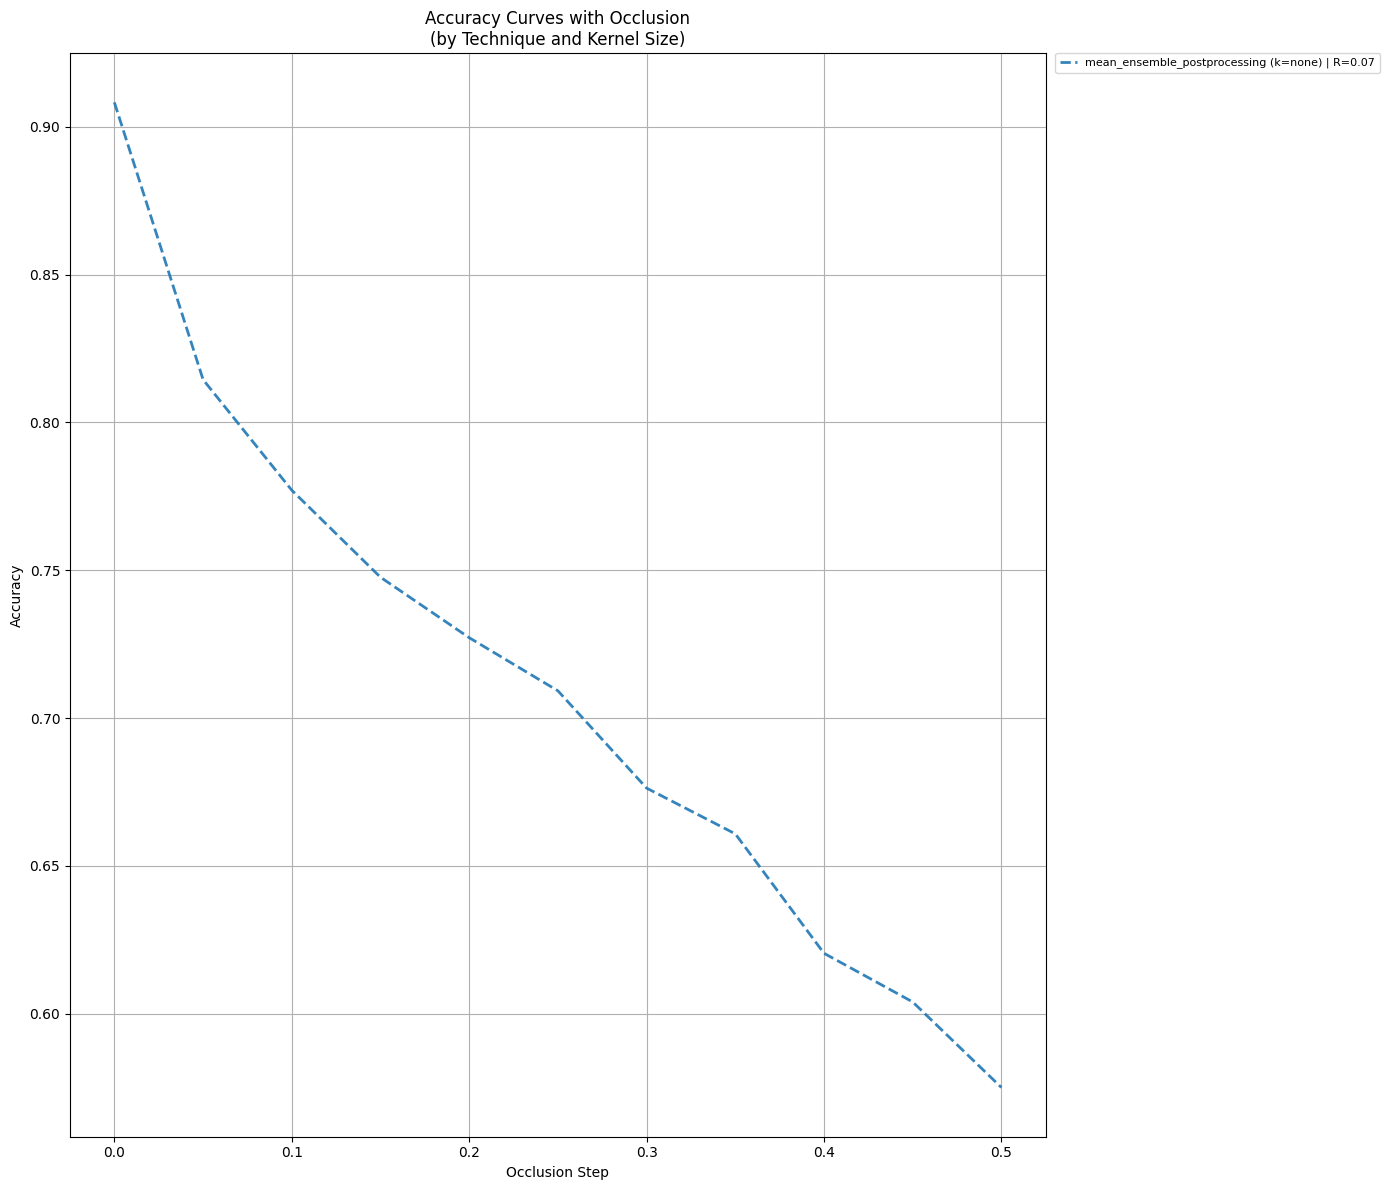

In [6]:
#compute fidelity and natural noise robustness with mean ensemble
attributions_mean_ensemble = plot_mean_ensemble(data_name='dermamnist',model_name='resnet50',
                                corruption_type = 'gaussian_noise', #pixelate,brightness_up
                                agreement_measure='l1',
                                normalization='quantil_local', 
                                n_classes = 7)




In [ ]:
#compute fidelity and natural noise robustness with topk
attributions_topk = plot_with_topk(data_name='dermamnist',model_name='resnet50',
                                corruption_type = 'gaussian_noise', #pixelate,brightness_up
                                agreement_measure='l1',
                                normalization='quantil_local', 
                                n_classes = 7)

In [ ]:
#compute adversarial_robustness with ensemble
attributions_mean_ensemble_adv = main_ensemble(train_data_name='dermamnist',model_name='resnet50',
                                epsilon=2,
                                agreement_measure='l1', 
                                ensemble_type='mean_ensemble',
                                post_processing= True #set False to compute ensemble without postprocessing
                                )

Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 41173.10it/s]

Finished successfully


In [3]:
#compute adversarial_robustness with topk
attributions_topk_adv = main_ensemble(train_data_name='dermamnist',model_name='resnet50',
                                epsilon=2,
                                agreement_measure='l1', 
                                ensemble_type='topk',
                                post_processing= True #set False to compute ensemble without postprocessing
                                )

Calculating agreement: 100%|██████████| 100/100 [00:00<00:00, 54906.45it/s]

Finished successfully


In [15]:
def plot(imgs: List[np.ndarray]):
    titles = [r'$\boldsymbol{x}$', 
                r'$\mathcal{I}(\boldsymbol{x},f)$',
                r'$\boldsymbol{x}_{\text{adv}}$',
                r'$\mathcal{I}(\boldsymbol{x}_{\text{adv}}, f)$']

    fig, axs = plt.subplots(1, 4, figsize=(20, 10), constrained_layout=False)  # Ensures equal sizes
    fig.subplots_adjust(wspace=0.2, hspace=0.2)  # Adjust spacing between images

    for i, (ax, img, title) in enumerate(zip(axs, imgs, titles)):
        ax.patch.set_edgecolor('black')
        ax.patch.set_linewidth(3)
        #print(title)
        ax.set_title(title, fontsize=26, pad=12)
        im = ax.imshow(img, cmap="terrain")

        # Create a divider for each image to ensure colorbars don’t affect sizing
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.15)  

        if i % 2 != 0:  # Add colorbar only to odd images
            cbar = fig.colorbar(im, cax=cax, orientation='vertical')
            cbar.ax.tick_params(labelsize=16)  # Adjust tick label size if needed
            
        else:
            cax.remove()  # Remove extra space for even images

        ax.set_xticks([])
        ax.set_yticks([])

In [18]:
def plots_dataset(data_name:str, n_classes:int, batch_size:int,algorithm:str):
    attributions_clean, data_clean = load_data(data_name, n_classes, batch_size,algorithm)
    breakpoint()
    for i, (name, adv) in enumerate(attributions_clean.items()):
        plot([
            data_clean.__getitem__from_name__(name)[0].numpy().transpose(1, 2, 0),
            attributions_preprocessing(attributions_clean[name], "l1", None, 1, 'quantil_local', None, None).detach().cpu().numpy(),
            attributions_preprocessing(attributions_clean[name], "l1", None, 1, 'quantil_local', None, None).detach().cpu().numpy(),
            attributions_preprocessing(attributions_clean[name], "l1", None, 1, 'quantil_local', None, None).detach().cpu().numpy()
        ])
        
        plt.show()

In [ ]:
plots_dataset("dermamnist",n_classes=7, batch_size=50,algorithm='SmoothGrad')

checkpoints/resnet50/dermamnist/checkpoint_best.pth
loading:checkpoints/resnet50/dermamnist/checkpoint_best.pth
attributions/resnet50_attributions/dermamnist/dermamnist_test/
